<a href="https://colab.research.google.com/github/nicoataiza/CS7318/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading in CIFAR-10

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [3]:
len(test_images)

10000

## Split to test-validation set

In [4]:
validation_images = test_images[:(len(test_images)//2)]
validation_labels = test_labels[:(len(test_images)//2)]

In [5]:
test_images = test_images[(len(test_images)//2):]
test_labels = test_labels[(len(test_labels)//2):]

# EDA

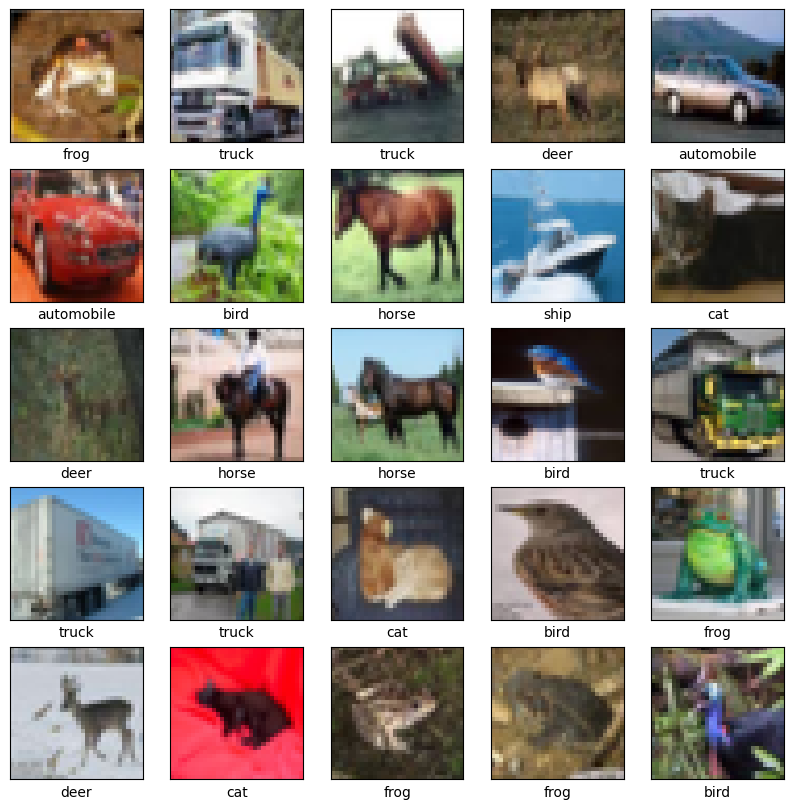

In [6]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Checking for Class count

In [7]:
c = {}
for l in train_labels:
  l = l[0]
  c[l] = c.get(l,0) + 1
for l in test_labels:
  l = l[0]
  c[l] = c.get(l,0) + 1
for l in validation_labels:
  l = l[0]
  c[l] = c.get(l,0) + 1

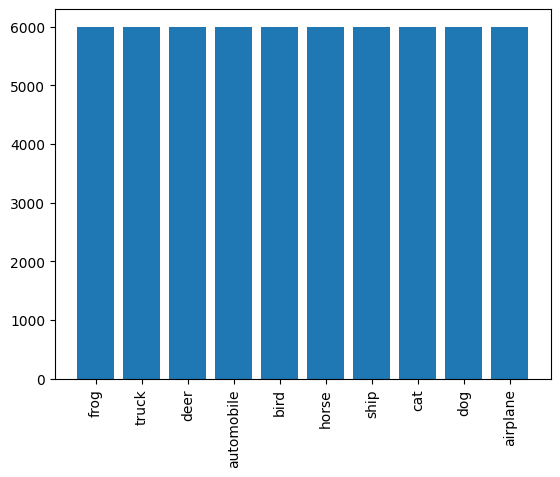

In [8]:
names = [class_names[i] for i in c.keys()]
values = list(c.values())
plt.bar(range(len(c)), values, tick_label=names)
plt.xticks(rotation=90)
plt.show()

In [9]:
del c
del names
del values

# Simple CNN

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

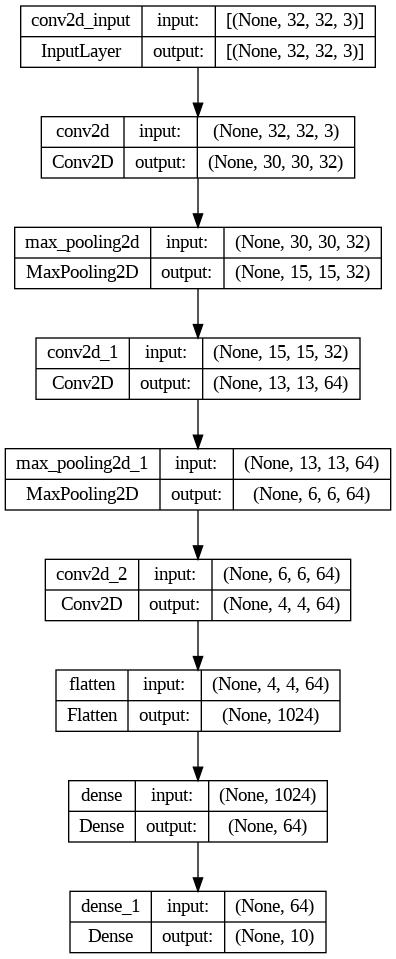

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
tf.keras.utils.plot_model(model, show_shapes=True)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [11]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(validation_images, validation_labels))

Epoch 1/10
1563/1563 [==============================] - 19s 5ms/step - loss: 1.7394 - accuracy: 0.3907 - val_loss: 1.4451 - val_accuracy: 0.4808
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3764 - accuracy: 0.5086 - val_loss: 1.3171 - val_accuracy: 0.5260
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2276 - accuracy: 0.5678 - val_loss: 1.3573 - val_accuracy: 0.5372
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1152 - accuracy: 0.6066 - val_loss: 1.2894 - val_accuracy: 0.5520
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0334 - accuracy: 0.6395 - val_loss: 1.0624 - val_accuracy: 0.6340
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9605 - accuracy: 0.6652 - val_loss: 1.1035 - val_accuracy: 0.6268
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9008 - accuracy: 0.6868 - val_loss: 1.0392 - val_accuracy

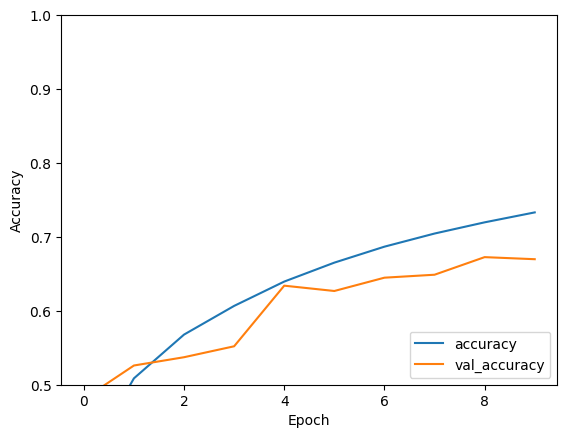

In [12]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [13]:
len(test_images)

5000

In [14]:
len(test_labels)

5000

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

157/157 - 0s - loss: 1.0412 - accuracy: 0.6586 - 340ms/epoch - 2ms/step
0.6585999727249146


65.16% accuracy on benchmark simple model

In [37]:
tf.keras.backend.clear_session()

# Data Augmentation

## Making DataSet objects

In [38]:
train_ds = tf.data.Dataset.from_tensor_slices((train_images,train_labels)).batch(100).shuffle(len(train_images)//100)

test_ds = tf.data.Dataset.from_tensor_slices((test_images,test_labels)).batch(100).shuffle(len(test_images)//100)

validation_ds = tf.data.Dataset.from_tensor_slices((validation_images,validation_labels)).batch(100).shuffle(len(validation_images)//100)

## Data Augmentation Layer

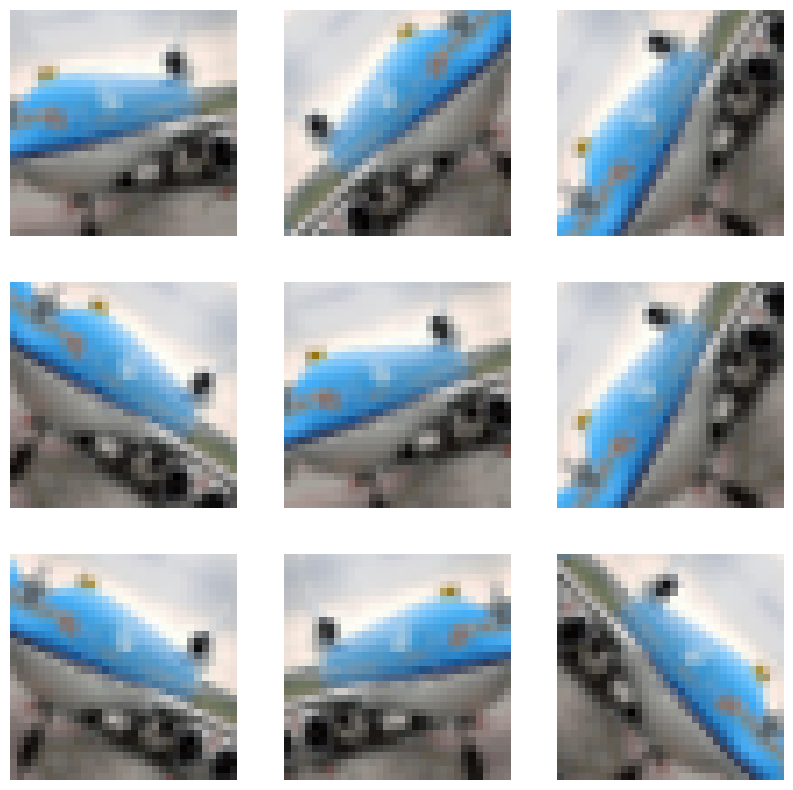

In [39]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

for image, _ in train_ds.take(1):
  plt.figure(figsize=(10, 10))
  first_image = image[0]
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

# Transfer Learning Using ResNet50

We are comparing the perfomrance of the Simple CNN with transfer learning of ResNet50 trained on the ImageNet dataset.

In [40]:
num_classes = 10  # Number of classes in your new dataset
input_shape = (224, 224, 3) # ResNet50 has this fixed input size

# Load the pre-trained ResNet-50 model
base_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)


In [41]:
preprocess_input = tf.keras.layers.Resizing(224,224)

Inspect Model Architecture

In [42]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

We will first assess the model's performance without fine-tuning. To accomplish this, `base_model.trainable = False` will be invoked.

In [43]:
base_model.trainable = False

In [44]:
inputs = tf.keras.Input(shape=(32, 32, 3))
# skip this because accuracy is around 13%
# x = data_augmentation(inputs)
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
outputs = tf.keras.layers.Dense(num_classes,activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

In [45]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 10)                10250     
                                                             

Architecture of our Transfer-Learning

In [46]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

## Model Training

In [47]:
history = model.fit(train_ds,
                    epochs=10,
                    validation_data=validation_ds)

Epoch 1/10
500/500 [==============================] - 175s 310ms/step - loss: 0.5636 - accuracy: 0.8098 - val_loss: 0.4639 - val_accuracy: 0.8418
Epoch 2/10
500/500 [==============================] - 154s 308ms/step - loss: 0.3729 - accuracy: 0.8693 - val_loss: 0.4315 - val_accuracy: 0.8516
Epoch 3/10
500/500 [==============================] - 154s 307ms/step - loss: 0.3083 - accuracy: 0.8902 - val_loss: 0.4235 - val_accuracy: 0.8600
Epoch 4/10
500/500 [==============================] - 153s 306ms/step - loss: 0.2566 - accuracy: 0.9074 - val_loss: 0.4335 - val_accuracy: 0.8574
Epoch 5/10
500/500 [==============================] - 160s 319ms/step - loss: 0.2124 - accuracy: 0.9242 - val_loss: 0.4433 - val_accuracy: 0.8596
Epoch 6/10
500/500 [==============================] - 153s 306ms/step - loss: 0.1693 - accuracy: 0.9385 - val_loss: 0.4295 - val_accuracy: 0.8660
Epoch 7/10
500/500 [==============================] - 153s 305ms/step - loss: 0.1329 - accuracy: 0.9528 - val_loss: 0.4664 -

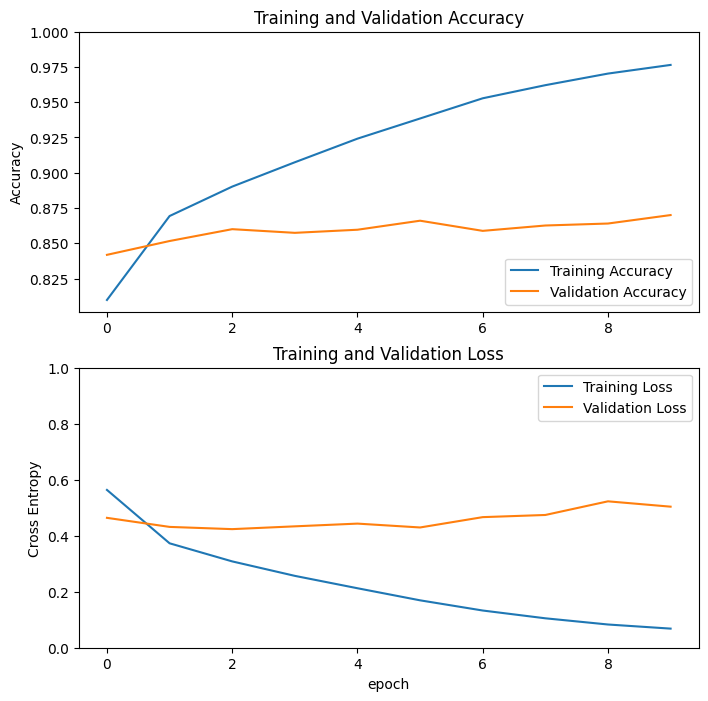

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Due to overifitting, we will include data augmentation.

In [73]:
inputs = tf.keras.Input(shape=(32, 32, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
outputs = tf.keras.layers.Dense(num_classes,activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

history = model.fit(train_ds,
                    epochs=10,
                    validation_data=validation_ds)

Epoch 1/10
500/500 [==============================] - 220s 420ms/step - loss: 0.8849 - accuracy: 0.6877 - val_loss: 0.5052 - val_accuracy: 0.8248
Epoch 2/10
500/500 [==============================] - 208s 415ms/step - loss: 0.5411 - accuracy: 0.8124 - val_loss: 0.3985 - val_accuracy: 0.8642
Epoch 3/10
500/500 [==============================] - 208s 415ms/step - loss: 0.4668 - accuracy: 0.8371 - val_loss: 0.3971 - val_accuracy: 0.8694
Epoch 4/10
500/500 [==============================] - 208s 415ms/step - loss: 0.4270 - accuracy: 0.8522 - val_loss: 0.3772 - val_accuracy: 0.8722
Epoch 5/10
500/500 [==============================] - 214s 428ms/step - loss: 0.3904 - accuracy: 0.8619 - val_loss: 0.3413 - val_accuracy: 0.8876
Epoch 6/10
500/500 [==============================] - 209s 417ms/step - loss: 0.3687 - accuracy: 0.8718 - val_loss: 0.3417 - val_accuracy: 0.8818
Epoch 7/10
500/500 [==============================] - 209s 417ms/step - loss: 0.3497 - accuracy: 0.8791 - val_loss: 0.3532 -

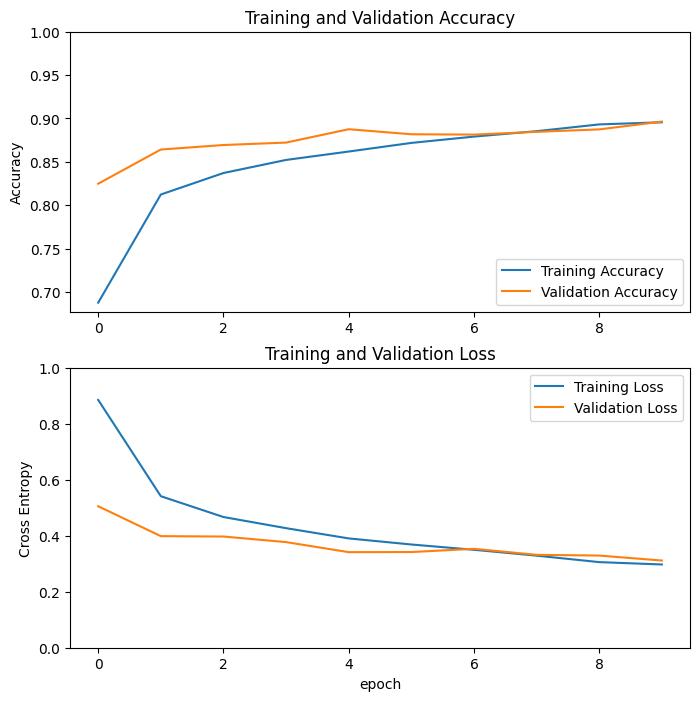

In [74]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

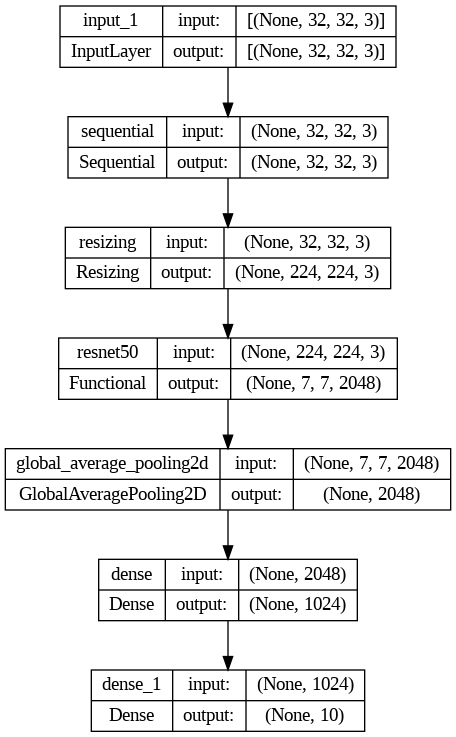

In [75]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [76]:
tf.keras.backend.clear_session()

## Fine-tuning for improvements on the specific task

In [77]:
base_model.trainable = True

In [78]:
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = int(len(base_model.layers) * 0.75)

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  175


In [79]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate/10), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [80]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 sequential (Sequential)     (None, 32, 32, 3)         0         
                                                                 
 resizing (Resizing)         (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                             

In [81]:
len(model.trainable_variables)

56

In [82]:
fine_tune_epochs = 10
total_epochs =  10 + fine_tune_epochs

history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_ds)

Epoch 10/20
500/500 [==============================] - 220s 420ms/step - loss: 0.2091 - accuracy: 0.9269 - val_loss: 0.2831 - val_accuracy: 0.9068
Epoch 11/20
500/500 [==============================] - 208s 416ms/step - loss: 0.1823 - accuracy: 0.9360 - val_loss: 0.2939 - val_accuracy: 0.9096
Epoch 12/20
500/500 [==============================] - 208s 416ms/step - loss: 0.1730 - accuracy: 0.9385 - val_loss: 0.2805 - val_accuracy: 0.9092
Epoch 13/20
500/500 [==============================] - 209s 417ms/step - loss: 0.1653 - accuracy: 0.9417 - val_loss: 0.2822 - val_accuracy: 0.9130
Epoch 14/20
500/500 [==============================] - 208s 416ms/step - loss: 0.1558 - accuracy: 0.9447 - val_loss: 0.2829 - val_accuracy: 0.9124
Epoch 15/20
500/500 [==============================] - 215s 430ms/step - loss: 0.1503 - accuracy: 0.9469 - val_loss: 0.2867 - val_accuracy: 0.9088
Epoch 16/20
500/500 [==============================] - 208s 416ms/step - loss: 0.1487 - accuracy: 0.9465 - val_loss: 0

In [83]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

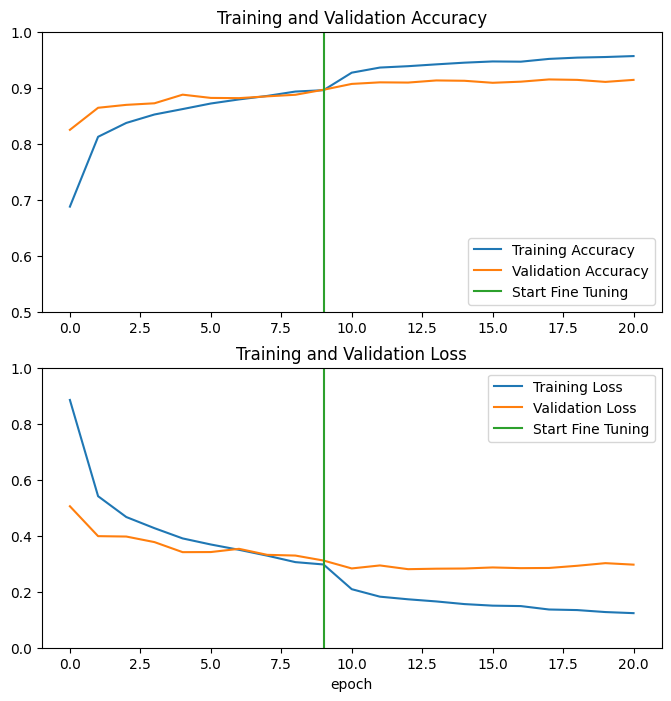

In [84]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.5, 1])
plt.plot([10-1,10-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([10-1,10-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [85]:
loss

[0.8848636150360107,
 0.5411461591720581,
 0.466797411441803,
 0.42696598172187805,
 0.3903735280036926,
 0.3686906397342682,
 0.34972989559173584,
 0.328830748796463,
 0.3057064116001129,
 0.2973231375217438,
 0.2091006487607956,
 0.1823117733001709,
 0.17295439541339874,
 0.16531343758106232,
 0.15583272278308868,
 0.1502740979194641,
 0.14870582520961761,
 0.1365184485912323,
 0.13447043299674988,
 0.1273755133152008,
 0.12347409129142761]

## Evaluating on test data set

In [86]:
loss, accuracy = model.evaluate(test_ds)
print('Test accuracy :', accuracy)

50/50 [==============================] - 14s 276ms/step - loss: 0.2771 - accuracy: 0.9186
Test accuracy : 0.9186000227928162


# Transfer Learning Using EfficientNetV2S

Given sparsity of dataset we also compare both to EfficientNetV2s

In [119]:
tf.keras.backend.clear_session()

In [120]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2L(
    include_top=False,
    weights='imagenet',
    input_shape=(32, 32, 3),
    include_preprocessing=True
)

473176280/473176280 [==============================] - 19s 0us/step


In [121]:
base_model.trainable = False

In [122]:
base_model.summary()

Model: "efficientnetv2-l"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 32, 32, 3)            0         ['input_1[0][0]']             
                                                                                                  
 stem_conv (Conv2D)          (None, 16, 16, 32)           864       ['rescaling[0][0]']           
                                                                                                  
 stem_bn (BatchNormalizatio  (None, 16, 16, 32)           128       ['stem_conv[0][0]']           
 n)                                                                                

In [123]:
inputs = tf.keras.Input(shape=(32, 32, 3))
# x = preprocess_input(inputs)
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(640, activation='relu')(x)
outputs = tf.keras.layers.Dense(num_classes,activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

In [124]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 efficientnetv2-l (Function  (None, 1, 1, 1280)        117746848 
 al)                                                             
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 640)               819840    
                                                                 
 dense_1 (Dense)             (None, 10)                6410      
                                                                 
Total params: 118573098 (452.32 MB)
Trainable params: 826250 

In [125]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

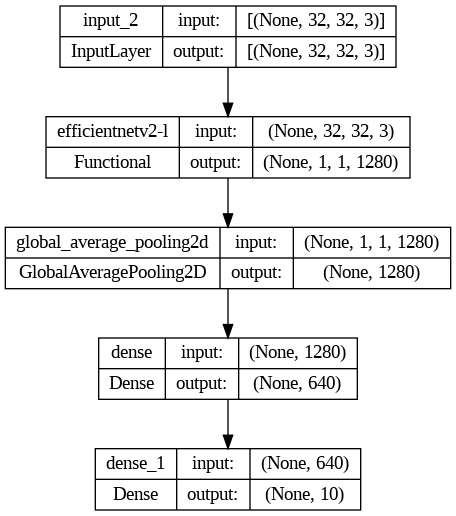

In [126]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [127]:
history = model.fit(train_ds,
                    epochs=10,
                    validation_data=validation_ds)

Epoch 1/10
500/500 [==============================] - 87s 114ms/step - loss: 2.1357 - accuracy: 0.2144 - val_loss: 1.9147 - val_accuracy: 0.3004
Epoch 2/10
500/500 [==============================] - 50s 101ms/step - loss: 1.8123 - accuracy: 0.3562 - val_loss: 1.7100 - val_accuracy: 0.3910
Epoch 3/10
500/500 [==============================] - 51s 102ms/step - loss: 1.6622 - accuracy: 0.4093 - val_loss: 1.6250 - val_accuracy: 0.4188
Epoch 4/10
500/500 [==============================] - 48s 96ms/step - loss: 1.5928 - accuracy: 0.4347 - val_loss: 1.5736 - val_accuracy: 0.4592
Epoch 5/10
500/500 [==============================] - 50s 101ms/step - loss: 1.5333 - accuracy: 0.4554 - val_loss: 1.5111 - val_accuracy: 0.4558
Epoch 6/10
500/500 [==============================] - 51s 101ms/step - loss: 1.4966 - accuracy: 0.4691 - val_loss: 1.4798 - val_accuracy: 0.4676
Epoch 7/10
500/500 [==============================] - 49s 97ms/step - loss: 1.4691 - accuracy: 0.4816 - val_loss: 1.5316 - val_accu

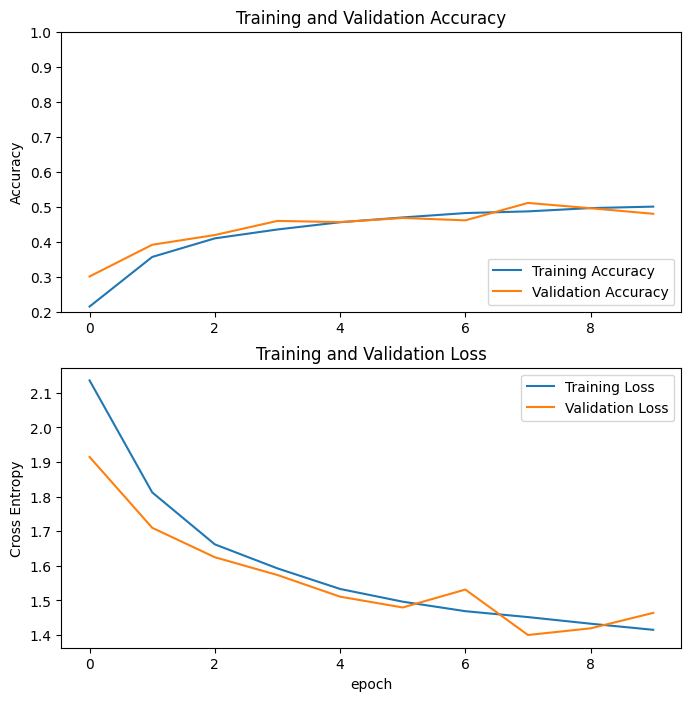

In [128]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
# plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [129]:
tf.keras.backend.clear_session()

In [130]:
loss

[2.1357436180114746,
 1.8123153448104858,
 1.6621662378311157,
 1.592756986618042,
 1.533329963684082,
 1.4965814352035522,
 1.4691212177276611,
 1.4520597457885742,
 1.4329580068588257,
 1.4153006076812744]

## Fine-Tuning

In [131]:
base_model.trainable = True

In [132]:
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = int(len(base_model.layers) * 0.75)

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

Number of layers in the base model:  1028


In [133]:
base_learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate/10), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [134]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 efficientnetv2-l (Function  (None, 1, 1, 1280)        117746848 
 al)                                                             
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 640)               819840    
                                                                 
 dense_1 (Dense)             (None, 10)                6410      
                                                                 
Total params: 118573098 (452.32 MB)
Trainable params: 6412810

In [135]:
len(model.trainable_variables)

228

In [136]:
fine_tune_epochs = 10
total_epochs =  10 + fine_tune_epochs

history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_ds)

Epoch 10/20
500/500 [==============================] - 170s 222ms/step - loss: 1.2033 - accuracy: 0.5814 - val_loss: 1.0885 - val_accuracy: 0.6228
Epoch 11/20
500/500 [==============================] - 105s 209ms/step - loss: 0.9534 - accuracy: 0.6645 - val_loss: 0.9531 - val_accuracy: 0.6766
Epoch 12/20
500/500 [==============================] - 105s 209ms/step - loss: 0.8403 - accuracy: 0.7039 - val_loss: 0.9391 - val_accuracy: 0.6824
Epoch 13/20
500/500 [==============================] - 105s 209ms/step - loss: 0.7438 - accuracy: 0.7364 - val_loss: 0.9321 - val_accuracy: 0.6940
Epoch 14/20
500/500 [==============================] - 105s 210ms/step - loss: 0.6333 - accuracy: 0.7767 - val_loss: 0.9705 - val_accuracy: 0.6852
Epoch 15/20
500/500 [==============================] - 105s 209ms/step - loss: 0.5226 - accuracy: 0.8146 - val_loss: 0.9909 - val_accuracy: 0.6868
Epoch 16/20
500/500 [==============================] - 106s 211ms/step - loss: 0.4065 - accuracy: 0.8554 - val_loss: 1

In [137]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

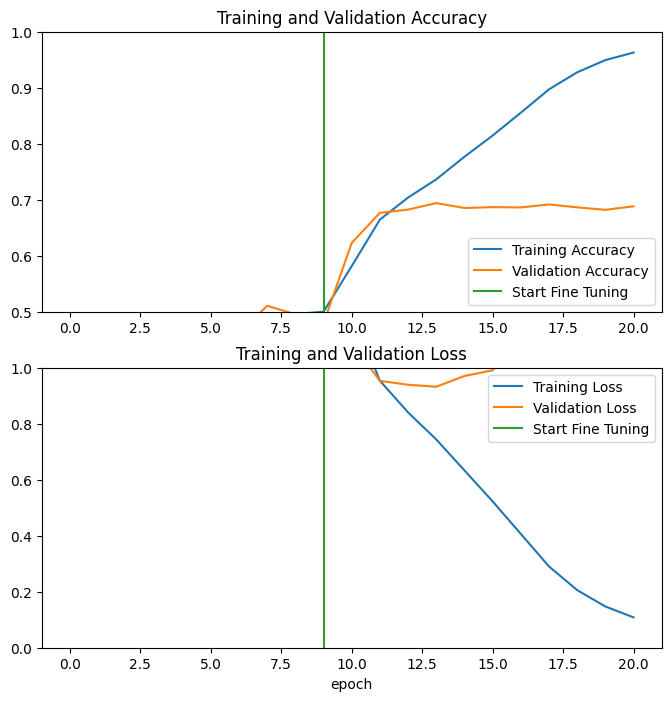

In [138]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0.5, 1])
plt.plot([10-1,10-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([10-1,10-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

## Evaluation

In [139]:
loss, accuracy = model.evaluate(test_ds)
print('Test accuracy :', accuracy)

50/50 [==============================] - 5s 89ms/step - loss: 1.4688 - accuracy: 0.6898
Test accuracy : 0.6898000240325928
